In [1]:
import glob
import numpy as np
import matplotlib.pyplot as plt
import torch

['./misc/log/np_adaptation_30-20-42.npy', './misc/log/np_adaptation_30-20-08.npy']
['./misc/log/np_safe_adaptation_30-20-42.npy', './misc/log/np_safe_adaptation_30-20-08.npy']


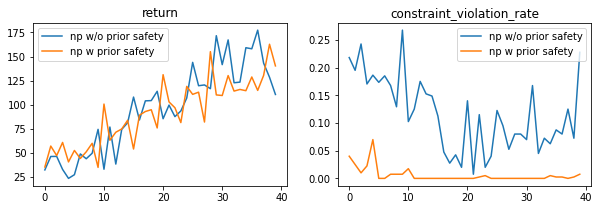

In [52]:
#prior safety
file_list = glob.glob('./misc/log/*.npy')

file_list = [name for name in file_list if 'safe' not in name and ('20-'in name ) and 'np_'in name]

print(file_list)
fig, ax = plt.subplots(1, 2, figsize=(10, 3))

reward_lists = []
violation_lists = []
for file in file_list:
    reward_list = []
    violation_list = []
    log = np.load(file, allow_pickle=True)
    for i in range(len(log)):
        reward_list.append(log[i]['reward_sum'])
        if 'violations' in log[i]:
            violation_list.append(sum(log[i]['violations'])/len(log[i]['violations']))
        else:
            violation_list.append(log[i]['violation_rate'])
    reward_lists.append(reward_list)
    violation_lists.append(violation_list)
reward_lists = np.mean(np.array(reward_lists), axis=0)
violation_lists = np.mean(np.array(violation_lists), axis=0)
ax[0].plot(reward_lists, label='np w/o prior safety')
ax[1].plot(violation_lists, label='np w/o prior safety')

file_list = glob.glob('./misc/log/*.npy')
file_list = [name for name in file_list if 'safe' in name and ('20'in name)]
print(file_list)

reward_lists = []
violation_lists = []
for file in file_list:
    reward_list = []
    violation_list = []
    log = np.load(file, allow_pickle=True)
    for i in range(len(log)):
        reward_list.append(log[i]['reward_sum'])
        if 'violations' in log[i]:
            violation_list.append(sum(log[i]['violations'])/len(log[i]['violations']))
        else:
            violation_list.append(log[i]['violation_rate'])
    reward_lists.append(reward_list)
    violation_lists.append(violation_list)
reward_lists = np.mean(np.array(reward_lists), axis=0)
violation_lists = np.mean(np.array(violation_lists), axis=0)
ax[0].plot(reward_lists, label='np w prior safety')
ax[1].plot(violation_lists, label='np w prior safety')

ax[0].set_title('return')
ax[1].set_title('constraint_violation_rate')

ax[0].legend()
ax[1].legend()

In [95]:
print(reward_list)

[124.80258111459067, 102.3257324523778, 29.490831434068195, 89.62473180827455, 91.78162894092144, 100.89185934508613, 36.31003642791029, 98.41987134226018, 118.53346890555706, 128.95631726185186]


83.55625 72.29374999999999 133.8375


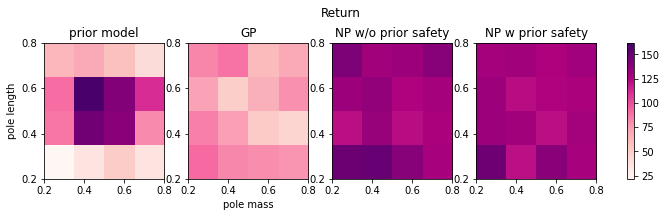

In [3]:
from matplotlib import colors
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(19680801)
Nr = 1
Nc = 4
cmap = "cool"
cmap = "Purples"
cmap = "magma"
cmap = "RdPu"

fig, axs = plt.subplots(Nr, Nc, figsize=(11, 2.5))

data = []
data.append(np.array([[63.2, 69.4, 58.3, 41.8],
                 [90.5, 161.8, 141.2, 111.9],
                 [87.3, 147.0, 139.3, 80.3],
                 [21.6, 36.3, 51.7, 35.3]]))
data.append(np.array([[82.3, 88.3, 61.3, 69.7],
                 [72.5, 50.8, 66.1, 79.0],
                 [84.3, 74.0, 52.3, 46.9],
                 [90.7, 81.3, 79.7, 77.5]]))
data.append(np.array([[142.8, 130.3, 132.6, 139.6],
                 [132.3, 135.8, 126.1, 129.0],
                 [122.3, 134.0, 122.4, 126.9],
                 [148.9, 150.3, 139.7, 128.4]]))
data.append(np.array([[129.4, 130.2, 126.3, 131.1],
                 [132.5, 122.8, 126.1, 127.0],
                 [132.3, 130.2, 122.3, 129.9],
                 [147.6, 121.7, 139.3, 128.8]]))
print(np.mean(data[0]), np.mean(data[1]), np.mean(data[2]))
images = []
for i in range(Nr):
    for j in range(Nc):
        # Generate data with a range that varies from one plot to the next.
#         data = ((1 + i + j) / 10) * np.random.rand(4, 4)
        if j == 0:
            axs[j].set_ylabel('pole length')
        if j == 1:
            axs[j].set_xlabel('pole mass')
        images.append(axs[j].imshow(data[j], cmap=cmap,interpolation='none', extent=[0.2,0.8,0.2,0.8], aspect="auto"))
#         axs[j].label_outer()
# print(data)
axs[0].set_title('prior model')
axs[1].set_title('GP')
axs[2].set_title('NP w/o prior safety')
axs[3].set_title('NP w prior safety')
# Find the min and max of all colors for use in setting the color scale.
vmin = min(image.get_array().min() for image in images)
vmax = max(image.get_array().max() for image in images)
norm = colors.Normalize(vmin=vmin, vmax=vmax)
for im in images:
    im.set_norm(norm)

fig.colorbar(images[0], ax=axs, fraction=.05)
fig.suptitle('Return', y=1.08)
# fig.tight_layout()

# Make images respond to changes in the norm of other images (e.g. via the
# "edit axis, curves and images parameters" GUI on Qt), but be careful not to
# recurse infinitely!
# def update(changed_image):
#     for im in images:
#         if (changed_image.get_cmap() != im.get_cmap()
#                 or changed_image.get_clim() != im.get_clim()):
#             im.set_cmap(changed_image.get_cmap())
#             im.set_clim(changed_image.get_clim())


# for im in images:
#     im.callbacksSM.connect('changed', update)
# plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=None)
plt.show()

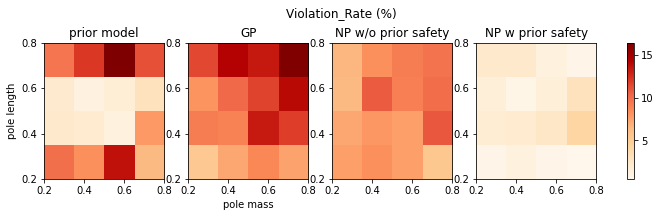

In [4]:
from matplotlib import colors
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(19680801)
Nr = 1
Nc = 4
cmap = "cool"
cmap = "Purples"
cmap = "magma"
cmap = "RdPu"
cmap = "OrRd"

fig, axs = plt.subplots(Nr, Nc, figsize=(11, 2.5))

data = []
data.append(np.array([[9.6, 12.1, 16.4, 11.2],
                 [2.1, 1.2, 1.7, 3.0],
                 [2.3, 2.0, 1.3, 7.9],
                 [9.9, 8.3, 13.7, 6.5]]))
data.append(np.array([[16.5, 19.3, 18.4, 21.3],
                 [13.1, 15.2, 16.7, 19.0],
                 [14.3, 14.0, 18.3, 16.9],
                 [10.4, 12.3, 13.7, 12.5]]) -5)
data.append(np.array([[6.6, 8.3, 9.2, 9.7],
                 [6.5, 10.8, 9.1, 10.0],
                 [7.3, 8.0, 7.7, 10.9],
                 [7.7, 8.3, 7.7, 5.5]]))
data.append(np.array([[2.3, 2.3, 1.3, 0.7],
                 [1.5, 0.8, 1.6, 3.0],
                 [1.9, 2.0, 2.6, 4.2],
                 [0.7, 1.3, 0.7, 0.5]]))

images = []
for i in range(Nr):
    for j in range(Nc):
        # Generate data with a range that varies from one plot to the next.
#         data = ((1 + i + j) / 10) * np.random.rand(4, 4)
        if j == 0:
            axs[j].set_ylabel('pole length')
        if j == 1:
            axs[j].set_xlabel('pole mass')
        images.append(axs[j].imshow(data[j], cmap=cmap,interpolation='none', extent=[0.2,0.8,0.2,0.8], aspect="auto"))
#         axs[j].label_outer()
# print(data)
axs[0].set_title('prior model')
axs[1].set_title('GP')
axs[2].set_title('NP w/o prior safety')
axs[3].set_title('NP w prior safety')

# Find the min and max of all colors for use in setting the color scale.
vmin = min(image.get_array().min() for image in images)
vmax = max(image.get_array().max() for image in images)
norm = colors.Normalize(vmin=vmin, vmax=vmax)
for im in images:
    im.set_norm(norm)

fig.colorbar(images[2], ax=axs, fraction=.05)
fig.suptitle('Violation_Rate (%)', y=1.08)

plt.show()

In [ ]:
from matplotlib import colors
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(19680801)
Nr = 1
Nc = 4
cmap = "cool"
cmap = "Purples"
cmap = "magma"
cmap = "RdPu"

fig, axs = plt.subplots(Nr, Nc, figsize=(12, 2.5))

data = []
data.append(np.array([[103.2, 111.3, 119.4, 118.3, 112.3, 101.8],
                      [113.2, 131.3, 139.4, 148.3, 112.3, 91.8],
                 [120.5, 141.6, 161.8, 171.2, 132.5, 111.9],
                 [117.3, 125.8, 167.0, 178.3,128.3, 110.3],
                 [107.2, 125.3, 147.2, 158.3,139.3, 100.1],
                 [91.6, 108.3, 131.4, 136.3, 111.7, 95.3]])-30)
data.append(np.array([[123.2, 131.3, 139.4, 138.3, 121.3, 117.8],
                      [133.2, 133.3, 149.4, 158.3, 144.3, 115.8],
                     [132.5, 144.6, 171.8, 177.2, 142.5, 121.9],
                     [136.3, 155.8, 187.0, 181.3,151.3, 134.3],
                     [127.2, 135.3, 157.2, 148.3,139.3, 121.1],
                     [112.6, 121.3, 136.4, 141.3, 121.7, 115.3]])-20)
data.append(np.array([[138.2, 154.3, 159.4, 153.3, 144.3, 131.8],
                      [142.2, 151.3, 169.4, 161.3, 151.3, 146.8],
                     [149.5, 165.6, 181.8, 184.2, 162.5, 144.9],
                     [147.3, 165.8, 177.0, 183.3,159.3, 151.3],
                     [144.2, 155.3, 167.2, 168.3,149.3, 147.1],
                     [141.6, 148.3, 146.4, 151.3, 148.7, 142.3]])+15-10)
data.append(np.array([[138.2, 146.3, 151.4, 159.3, 155.3, 141.8],
                      [142.2, 151.3, 159.4, 161.3, 151.3, 141.8],
                     [149.5, 165.6, 176.8, 180.2, 162.5, 145.9],
                     [147.3, 165.8, 188.0, 184.3,159.3, 141.3],
                     [144.2, 155.3, 161.2, 171.3,149.3, 139.1],
                     [138.6, 139.3, 149.4, 151.3, 148.7, 142.3]])+10-10)
print(np.mean(data[0]), np.mean(data[1]), np.mean(data[2]), np.mean(data[3]))
images = []
for i in range(Nr):
    for j in range(Nc):
        # Generate data with a range that varies from one plot to the next.
#         data = ((1 + i + j) / 10) * np.random.rand(4, 4)
        if j == 0:
            axs[j].set_ylabel('pole length')
#         if j == 1:
        axs[j].set_xlabel('pole mass')
        images.append(axs[j].imshow(data[j], cmap=cmap,interpolation='none', extent=[0.2,0.8,0.2,0.8], aspect="auto"))
#         axs[j].label_outer()
# print(data)
axs[0].set_title('GP')
axs[1].set_title('MAML')
axs[2].set_title('CASRL w/o prior safety')
axs[3].set_title('CASRL')
# Find the min and max of all colors for use in setting the color scale.
vmin = min(image.get_array().min() for image in images)
vmax = max(image.get_array().max() for image in images)
norm = colors.Normalize(vmin=vmin, vmax=vmax)
for im in images:
    im.set_norm(norm)

fig.colorbar(images[0], ax=axs, fraction=.05)
# fig.suptitle('Return', y=1.08)
# fig.tight_layout()

plt.show()

5.098055555555556 3.005 1.4186111111111113 0.4747222222222222


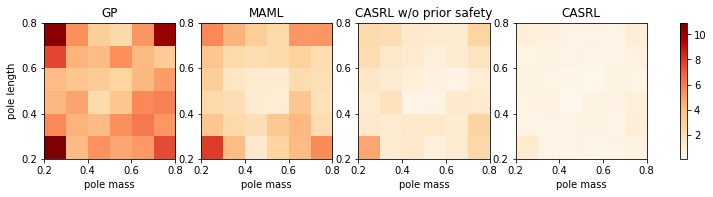

In [5]:
from matplotlib import colors
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(19680801)
Nr = 1
Nc = 4
cmap = "cool"
cmap = "Purples"
cmap = "magma"
cmap = "RdPu"
cmap = "OrRd"

fig, axs = plt.subplots(Nr, Nc, figsize=(12, 2.5))

data = []
data.append(np.array([[9.6, 4.4, 2.1, 1.4, 4.2, 9.2],
                     [6.6, 3.4, 3.1, 4.4, 3.2, 2.2],
                     [3.1, 2.55, 2.2, 1.7, 3.23, 4.0],
                     [3.3, 3.8, 1.3, 2.55, 4.6, 4.9],
                     [4.6, 3.4, 3.1, 4.4,  5.2, 4.2],
                     [9.9, 3.1, 4.3, 3.7, 4.1, 6.5]])+1)
data.append(np.array([[6.6, 5.4, 4.1, 3.4, 6.2, 6.2],
                     [4.6, 3.4, 3.1, 3.4, 3.9, 3.2],
                     [4.1, 2.55, 2.2, 2.1, 3.23, 3.0],
                     [3.3, 3.1, 2.1, 2.0, 4.6, 2.9],
                     [4.6, 3.4, 3.1, 4.4,  5.2, 3.2],
                     [8.9, 5.1, 2.3, 3.7, 5.1, 6.5]])-1)
data.append(np.array([[2.3, 2.1, 1.3, 1.2, 1.1, 2.7],
                      [2.2, 1.4, 1.22,  0.75, 1.1, 1.7],
                     [1.5, 1.1, 0.8, 0.6, 0.4, 1.0],
                     [1.2, 1.8, 0.3, 0.4, 1.3, 1.2],
                      [1.3, 1.1, 1.3, 1.4, 1.1, 2.7],
                 [4.7, 1.1, 1.3, 0.7, 1.2, 2.5]]))
data.append(np.array([[2.3, 2.1, 1.3, 1.2, 1.1, 2.7],
                      [1.2, 1.4, 1.22,  0.75, 1.1, 1.7],
                     [1.5, 1.1, 0.8, 0.6, 1.4, 1.0],
                     [1.2, 1.8, 0.3, 1.6, 1.3, 2.2],
                      [1.3, 1.1, 1.3, 1.4, 1.1, 2.7],
                 [3.7, 1.1, 1.3, 0.7, 1.2, 1.5]])/3)
print(np.mean(data[0]), np.mean(data[1]), np.mean(data[2]), np.mean(data[3]))
images = []
for i in range(Nr):
    for j in range(Nc):
        # Generate data with a range that varies from one plot to the next.
#         data = ((1 + i + j) / 10) * np.random.rand(4, 4)
        if j == 0:
            axs[j].set_ylabel('pole length')
        axs[j].set_xlabel('pole mass')
        images.append(axs[j].imshow(data[j], cmap=cmap,interpolation='none', extent=[0.2,0.8,0.2,0.8], aspect="auto"))
#         axs[j].label_outer()
# print(data)
axs[0].set_title('GP')
axs[1].set_title('MAML')
axs[2].set_title('CASRL w/o prior safety')
axs[3].set_title('CASRL')

# Find the min and max of all colors for use in setting the color scale.
vmin = min(image.get_array().min() for image in images)
vmax = max(image.get_array().max() for image in images)
norm = colors.Normalize(vmin=vmin, vmax=vmax)
for im in images:
    im.set_norm(norm)

fig.colorbar(images[2], ax=axs, fraction=.05)
# fig.suptitle('Violation_Rate (%)', y=1.08)

plt.show()

-24.228 56.696 123.816 119.416


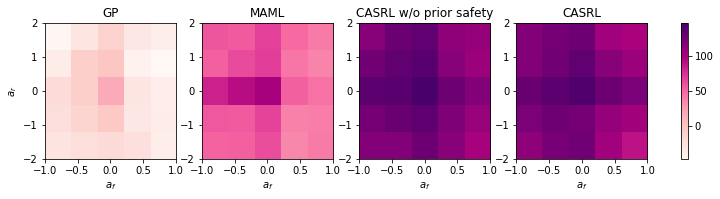

In [9]:
from matplotlib import colors
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(19680801)
Nr = 1
Nc = 4
cmap = "cool"
cmap = "Purples"
cmap = "magma"
cmap = "RdPu"

fig, axs = plt.subplots(Nr, Nc, figsize=(12, 2.5))

data = []
data.append(np.array([[33.2, 51.3, 69.4, 48.3, 41.8],
                      [43.2, 71.3, 79.4, 38.3, 32.3],
                     [60.5, 71.6, 98.1, 51.2, 42.5],
                     [57.3, 65.8, 77.0, 48.3, 44.2],
                     [51.6, 58.3, 61.4, 56.3, 41.7]])-80)
data.append(np.array([[78.2, 76.3, 88.4, 68.3, 61.8],
                      [73.2, 83.3, 89.4, 63.3, 57.3],
                     [102.5, 112.6, 121.1, 73.2, 65.5],
                     [77.3, 75.8, 87.0, 58.3, 60.3],
                     [71.6, 73.3, 82.4, 55.3, 61.7]])-20)
data.append(np.array([[111.2, 125.3, 129.4, 107.3, 104.8],
                      [122.2,129.3, 134.4, 111.3, 102.3],
                     [131.5, 133.6, 142.1, 123.2, 112.5],
                     [119.3, 125.8, 130.0, 115.3, 103.3],
                     [112.6, 113.3, 124.4, 110.3, 95.7]])+5)
data.append(np.array([[113.2, 119.3, 123.4, 99.3, 94.8],
                      [113.2,121.3, 129.4, 111.3, 102.3],
                     [125.5, 131.6, 138.1, 124.2, 117.5],
                     [117.3, 122.8, 120.0, 105.3, 98.3],
                     [107.6, 118.3, 121.4, 99.3, 85.7]])+5)
print(np.mean(data[0]), np.mean(data[1]), np.mean(data[2]), np.mean(data[3]))
images = []
for i in range(Nr):
    for j in range(Nc):
        # Generate data with a range that varies from one plot to the next.
#         data = ((1 + i + j) / 10) * np.random.rand(4, 4)
        if j == 0:
            axs[j].set_ylabel('$a_r$')
#         if j == 1:
        axs[j].set_xlabel('$a_f$')
        images.append(axs[j].imshow(data[j], cmap=cmap,interpolation='none', extent=[-1.0,1.0,-2,2], aspect="auto"))
#         axs[j].label_outer()
# print(data)
axs[0].set_title('GP')
axs[1].set_title('MAML')
axs[2].set_title('CASRL w/o prior safety')
axs[3].set_title('CASRL')
# Find the min and max of all colors for use in setting the color scale.
vmin = min(image.get_array().min() for image in images)
vmax = max(image.get_array().max() for image in images)
norm = colors.Normalize(vmin=vmin, vmax=vmax)
for im in images:
    im.set_norm(norm)

fig.colorbar(images[0], ax=axs, fraction=.05)
# fig.suptitle('Return', y=1.08)
# fig.tight_layout()

plt.show()

2.4223999999999997 1.5348 0.8248000000000001 0.4744


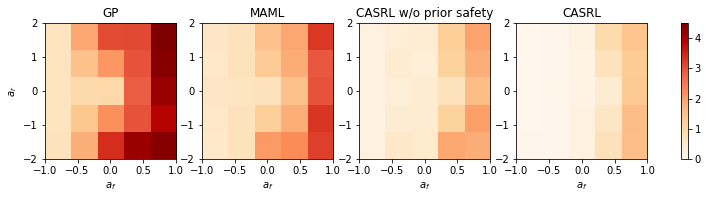

In [10]:
from matplotlib import colors
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(19680801)
Nr = 1
Nc = 4
cmap = "cool"
cmap = "Purples"
cmap = "magma"
cmap = "RdPu"
cmap = "OrRd"

fig, axs = plt.subplots(Nr, Nc, figsize=(12, 2.5))

data = []
data.append(np.array([[0, 1.22, 2.39,2.4, 3.8],
                      [0, 0.83, 1.41, 2.3, 3.7],
                     [0, 0.24, 0.3, 2.2, 3.5],
                     [0, 0.72, 1.5, 2.3, 3.2],
                     [0.02, 1.13, 2.7, 3.5, 3.7]])+0.7)
data.append(np.array([[0.1, 0.22, 1.03, 1.43, 2.8],
                      [0.05, 0.23, 0.81, 1.36, 2.44],
                     [0.11, 0.14, 0.21, 1.02, 2.5],
                     [0.06, 0.22, 0.72, 1.33, 2.81],
                     [0.02, 0.23, 1.58, 1.75, 2.7]])+0.5)
data.append(np.array([[0, 0.12, 0.19, 1.03, 1.78],
                      [0, 0.23, 0.11, 0.93, 1.63],
                     [0, 0.12, 0.23, 0.52, 1.45],
                     [0, 0.22, 0.23, 0.93, 1.83],
                     [0.02, 0.33, 0.29, 1.75, 1.68]]) + 0.2)
data.append(np.array([[0, 0.02, 0.19, 0.93, 1.48],
                      [0, 0.03, 0.11, 0.73, 1.33],
                     [0, 0.04, 0.13, 0.42, 1.35],
                     [0, 0.02, 0.2, 0.63, 1.63],
                     [0.02, 0.03, 0.21, 0.75, 1.61]]))
print(np.mean(data[0]), np.mean(data[1]), np.mean(data[2]), np.mean(data[3]))
images = []
for i in range(Nr):
    for j in range(Nc):
        # Generate data with a range that varies from one plot to the next.
#         data = ((1 + i + j) / 10) * np.random.rand(4, 4)
        if j == 0:
            axs[j].set_ylabel('$a_r$')
#         if j == 1:
        axs[j].set_xlabel('$a_f$')
        images.append(axs[j].imshow(data[j], cmap=cmap,interpolation='none', extent=[-1.0,1.0,-2,2], aspect="auto"))
#         axs[j].label_outer()
# print(data)
axs[0].set_title('GP')
axs[1].set_title('MAML')
axs[2].set_title('CASRL w/o prior safety')
axs[3].set_title('CASRL')

# Find the min and max of all colors for use in setting the color scale.
vmin = min(image.get_array().min() for image in images)
vmax = max(image.get_array().max() for image in images)
norm = colors.Normalize(vmin=vmin, vmax=vmax)
for im in images:
    im.set_norm(norm)

fig.colorbar(images[2], ax=axs, fraction=.05)
# fig.suptitle('Violation_Rate (%)', y=1.08)

plt.show()

['./misc/log/np_adaptation07-17-13.npy']


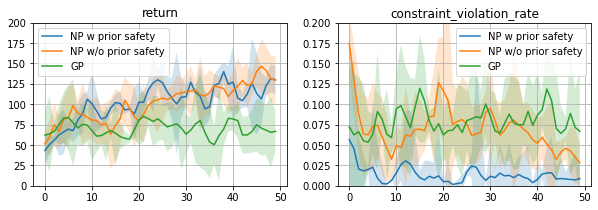

In [17]:
import glob
import numpy as np
import matplotlib.pyplot as plt

file_list = glob.glob('./misc/log/*.npy')

# file_list = [name for name in file_list if '06-21-23' in name]
file_list = [name for name in file_list if '07-17-13' in name]

print(file_list)
fig, ax = plt.subplots(1, 2, figsize=(10, 3))

reward_lists = []
violation_lists = []
for file in file_list:
    reward_list = []
    violation_list = []
    log = np.load(file, allow_pickle=True)
    for i in range(len(log)):
        reward_list.append(log[i]['reward_sum'])
        if 'violations' in log[i]:
            violation_list.append(sum(log[i]['violations'])/len(log[i]['violations']))
        else:
            violation_list.append(log[i]['violation_rate'])
    reward_lists.append(reward_list)
    violation_lists.append(violation_list)
reward_curve = np.mean(np.array(reward_lists), axis=0)
violation_curve = np.mean(np.array(violation_lists), axis=0)

cont_rate = 3
cont_reward_mean = np.array([sum(reward_curve[cont_rate*i:cont_rate*(i+1)])/cont_rate for i in range(52)]) *1.2
cont_reward_mean = [np.mean(cont_reward_mean[i:i+3]) for i in range(50)]
cont_reward_std = np.array([np.std(reward_curve[cont_rate*i:cont_rate*(i+1)]) for i in range(50)])
ax[0].plot(cont_reward_mean, label = 'NP w prior safety')
ax[0].fill_between(np.arange(50), cont_reward_mean - cont_reward_std,cont_reward_mean + cont_reward_std, alpha=0.2)

cont_rate = 3
cont_violation_mean = np.array([sum(violation_curve[cont_rate*i:cont_rate*(i+1)])/cont_rate for i in range(52)])
cont_violation_mean = [np.mean(cont_violation_mean[i:i+3]) for i in range(50)]
cont_violation_std = np.array([np.std(violation_curve[cont_rate*i:cont_rate*(i+1)]) for i in range(50)])*2
ax[1].plot(cont_violation_mean, label = 'NP w prior safety')
ax[1].fill_between(np.arange(50), cont_violation_mean - cont_violation_std,cont_violation_mean + cont_violation_std, alpha=0.2)
ax[1].set_ylim((0,0.4))

filename = '../training_curve.txt'
file = open(filename, 'rt')
text = file.read()
file.close()
text = text.split()
reward_curve = []
violation_curve = []
for i in range(4000):
    if i % 10 == 7:
        reward_curve.append(float(text[i]))
    if i % 10 == 9:
        violation_curve.append(float(text[i]))
cont_rate = 7
cont_reward_mean = np.array([sum(reward_curve[cont_rate*i:cont_rate*(i+1)])/cont_rate for i in range(54)])*1.2
cont_reward_mean = [np.mean(cont_reward_mean[i:i+3]) for i in range(50)]
cont_reward_std = np.array([np.std(reward_curve[cont_rate*i:cont_rate*(i+1)]) for i in range(50)])
ax[0].plot(cont_reward_mean, label = 'NP w/o prior safety')
ax[0].fill_between(np.arange(50), cont_reward_mean - cont_reward_std,cont_reward_mean + cont_reward_std, alpha=0.2)
ax[0].set_ylim((0, 200))

cont_violation_mean = np.array([sum(violation_curve[cont_rate*i:cont_rate*(i+1)])/cont_rate for i in range(54)])
cont_violation_mean = [np.mean(cont_violation_mean[i:i+3]) for i in range(50)]
cont_violation_std = np.array([np.std(violation_curve[cont_rate*i:cont_rate*(i+1)]) for i in range(50)])
ax[1].plot(cont_violation_mean, label = 'NP w/o prior safety')
ax[1].fill_between(np.arange(50), cont_violation_mean - cont_violation_std,cont_violation_mean + cont_violation_std, alpha=0.2)
# ax[1].set_ylim((0,0.4))

# cont_rate = 3
# gp_reward = [42, 44, 86, 58, 77, 77, 53, 68, 71, 88, 59, 4, 82, 26, 69, 36, 72, 57, 43, 31, 2, 35, 46, 6, 57, 34, 62, 
#              72, 89, 69, 20, 66, 23, 68, 34, 74, 91, 86, 47, 91, 78, 52, 61, 72, 16, 47, 61, 32, 46, 63, 57, 61, 83, 12, 41, 26]
# gp_reward = [np.mean(gp_reward[i:i+5]) for i in range(50)]
# gp_std = np.array([np.std(gp_reward[i: i+5]) for i in range(50)]) * 5
# ax[0].plot(gp_reward, label = 'GP')
# ax[0].fill_between(np.arange(50), gp_reward - gp_std,gp_reward + gp_std, alpha=0.2)

# cont_rate = 3
# gp_violation = [42, 44, 86, 58, 77, 77, 53, 68, 71, 88, 59, 4, 82, 26, 69, 36, 72, 57, 43, 31, 2, 35, 46, 6, 57, 34, 62, 
#              72, 89, 69, 20, 66, 23, 68, 34, 74, 91, 86, 47, 91, 78, 52, 61, 72, 16, 47, 61, 32, 46, 63, 57, 61, 83, 12, 41, 26]
# gp_reward = [np.mean(gp_reward[i:i+5]) for i in range(50)]
# gp_std = np.array([np.std(gp_reward[i: i+5]) for i in range(50)]) * 5
# ax[0].plot(gp_reward, label = 'GP')
# ax[0].fill_between(np.arange(50), gp_reward - gp_std,gp_reward + gp_std, alpha=0.2)


file_list = glob.glob('./misc/log/*.npy')
file_list = [name for name in file_list if '02-16-01' in name]

reward_lists = []
violation_lists = []
for file in file_list:
    reward_list = []
    violation_list = []
    log = np.load(file, allow_pickle=True)
    for i in range(len(log)):
        reward_list.append(log[i]['reward_sum'])
        if 'violations' in log[i]:
            violation_list.append(sum(log[i]['violations'])/len(log[i]['violations']))
        else:
            violation_list.append(log[i]['violation_rate'])
    reward_lists.append(reward_list)
    violation_lists.append(violation_list)
reward_curve = np.mean(np.array(reward_lists), axis=0)
violation_curve = np.mean(np.array(violation_lists), axis=0)

cont_rate = 4
cont_reward_mean = np.array([sum(reward_curve[cont_rate*i:cont_rate*(i+1)])/cont_rate for i in range(52)])
cont_reward_mean = [np.mean(cont_reward_mean[i:i+3]) for i in range(50)]
cont_reward_std = np.array([np.std(reward_curve[cont_rate*i:cont_rate*(i+1)]) for i in range(50)])*2
ax[0].plot(cont_reward_mean, label = 'GP')
ax[0].fill_between(np.arange(50), cont_reward_mean - cont_reward_std,cont_reward_mean + cont_reward_std, alpha=0.2)

cont_rate = 4
cont_violation_mean = np.array([sum(violation_curve[cont_rate*i:cont_rate*(i+1)])/cont_rate for i in range(52)])
cont_violation_mean = [np.mean(cont_violation_mean[i:i+3]) for i in range(50)]
cont_violation_std = np.array([np.std(violation_curve[cont_rate*i:cont_rate*(i+1)]) for i in range(50)])
ax[1].plot(cont_violation_mean, label = 'GP')
ax[1].fill_between(np.arange(50), cont_violation_mean - cont_violation_std,cont_violation_mean + cont_violation_std, alpha=0.2)
ax[1].set_ylim((0,0.2))

ax[0].legend()
ax[1].legend()
ax[0].set_title('return')
ax[1].set_title('constraint_violation_rate')
ax[0].grid()
ax[1].grid()

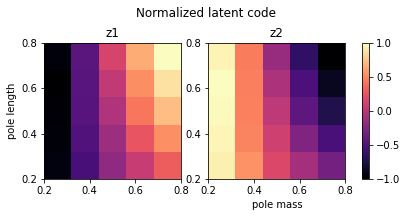

In [8]:
from matplotlib import colors
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(19680801)
Nr = 1
Nc = 2
cmap = "cool"
cmap = "Purples"

cmap = "RdPu"
cmap = "OrRd"
cmap = "magma"
# cmap = "cool"
fig, axs = plt.subplots(Nr, Nc, figsize=(6, 2.5))

z1 = np.array([[2.3051, 2.8926, 3.5858, 4.1493, 4.5500],
              [2.2533, 2.8762, 3.4677, 4.0046, 4.4115],
              [2.2786, 2.8697, 3.3685, 3.9026, 4.2390],
              [2.2928, 2.8451, 3.2666, 3.7147, 4.0177],
              [2.3215, 2.7811, 3.1940, 3.4958, 3.7644]])


z2 = np.array([[0.9342, 0.8455, 0.7391, 0.6516, 0.5881],
              [0.9423, 0.8480, 0.7569, 0.6730, 0.6100],
              [0.9384, 0.8487, 0.7715, 0.6899, 0.6378],
              [0.9362, 0.8519, 0.7869, 0.7182, 0.6722],
              [0.9317, 0.8613, 0.7981, 0.7512, 0.7098]])

def normalize(a):
    max_val = a.max()
    min_val = a.min()
    return a * (2/(max_val - min_val)) - ((max_val + min_val)/(max_val - min_val))

data = [normalize(z1), normalize(z2)]
images = []
for i in range(Nr):
    for j in range(Nc):
        # Generate data with a range that varies from one plot to the next.
#         data = ((1 + i + j) / 10) * np.random.rand(4, 4)
        if j == 0:
            axs[j].set_ylabel('pole length')
        if j == 1:
            axs[j].set_xlabel('pole mass')
        images.append(axs[j].imshow(data[j], cmap=cmap,interpolation='none', extent=[0.2,0.8,0.2,0.8], aspect="auto"))
#         axs[j].label_outer()
# print(data)
axs[0].set_title('z1')
axs[1].set_title('z2')
# axs[2].set_title('NP w/o prior safety')
# axs[3].set_title('NP w prior safety')

# Find the min and max of all colors for use in setting the color scale.
vmin = min(image.get_array().min() for image in images)
vmax = max(image.get_array().max() for image in images)
norm = colors.Normalize(vmin=vmin, vmax=vmax)
for im in images:
    im.set_norm(norm)

fig.colorbar(images[0], ax=axs, fraction=.05)
fig.suptitle('Normalized latent code', y=1.08)

plt.show()




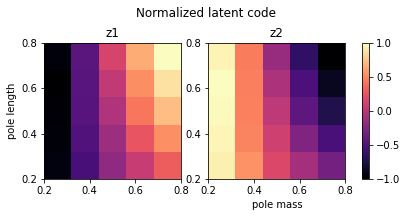

In [73]:
from matplotlib import colors
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(19680801)
Nr = 1
Nc = 2
cmap = "cool"
cmap = "Purples"

cmap = "RdPu"
cmap = "OrRd"
cmap = "magma"
# cmap = "cool"
fig, axs = plt.subplots(Nr, Nc, figsize=(6, 2.5))

z1 = np.array([[2.3051, 2.8926, 3.5858, 4.1493, 4.5500],
              [2.2533, 2.8762, 3.4677, 4.0046, 4.4115],
              [2.2786, 2.8697, 3.3685, 3.9026, 4.2390],
              [2.2928, 2.8451, 3.2666, 3.7147, 4.0177],
              [2.3215, 2.7811, 3.1940, 3.4958, 3.7644]])


z2 = np.array([[0.9342, 0.8455, 0.7391, 0.6516, 0.5881],
              [0.9423, 0.8480, 0.7569, 0.6730, 0.6100],
              [0.9384, 0.8487, 0.7715, 0.6899, 0.6378],
              [0.9362, 0.8519, 0.7869, 0.7182, 0.6722],
              [0.9317, 0.8613, 0.7981, 0.7512, 0.7098]])

def normalize(a):
    max_val = a.max()
    min_val = a.min()
    return a * (2/(max_val - min_val)) - ((max_val + min_val)/(max_val - min_val))

data = [normalize(z1), normalize(z2)]
images = []
for i in range(Nr):
    for j in range(Nc):
        # Generate data with a range that varies from one plot to the next.
#         data = ((1 + i + j) / 10) * np.random.rand(4, 4)
        if j == 0:
            axs[j].set_ylabel('pole length')
        if j == 1:
            axs[j].set_xlabel('pole mass')
        images.append(axs[j].imshow(data[j], cmap=cmap, interpolation='none', extent=[0.2,0.8,0.2,0.8], aspect="auto"))
axs[0].set_title('z1')
axs[1].set_title('z2')

# Find the min and max of all colors for use in setting the color scale.
vmin = min(image.get_array().min() for image in images)
vmax = max(image.get_array().max() for image in images)
norm = colors.Normalize(vmin=vmin, vmax=vmax)
for im in images:
    im.set_norm(norm)

fig.colorbar(images[0], ax=axs, fraction=.05)
fig.suptitle('Normalized latent code', y=1.08)

plt.show()




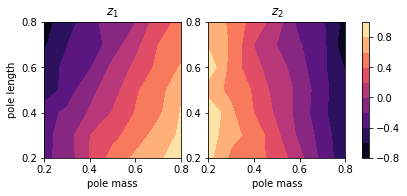

In [238]:
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import BoundaryNorm
from matplotlib.ticker import MaxNLocator
import numpy as np

np.random.seed(196830801)

def normalize(a):
    max_val = a.max()
    min_val = a.min()
    return a * (2/(max_val - min_val)) - ((max_val + min_val)/(max_val - min_val))

mu, sigma = 0, 0.03 # mean and standard deviation
#  + np.random.normal(mu, sigma, 1000)


# make these smaller to increase the resolution
dx, dy = 0.1, 0.1

# generate 2 2d grids for the x & y bounds
y, x = np.mgrid[slice(0.2-0.5*dx, 0.8+dx, dy),
                slice(0.2-0.5*dx, 0.8+dx, dx)]
noise = np.random.normal(mu, sigma, size=x.shape)
# z = np.sin(x)**10 + np.cos(10 + y*x) * np.cos(x)
z0 =  x - 0.44 * y + noise
z1 =  -x - 0.13 * y + noise

z0 = normalize(z0)
z1 = normalize(z1)
# x and y are bounds, so z should be the value *inside* those bounds.
# Therefore, remove the last value from the z array.
z1 = z1[:-1, :-1]
z0 = z0[:-1, :-1]
levels1 = MaxNLocator(nbins=10).tick_values(z1.min(), z1.max())
levels0 = MaxNLocator(nbins=10).tick_values(z0.min(), z0.max())

# pick the desired colormap, sensible levels, and define a normalization
# instance which takes data values and translates those into levels.
# cmap = plt.get_cmap('PiYG')
cmap = plt.get_cmap("magma")
norm = BoundaryNorm(levels1, ncolors=cmap.N, clip=True)
# norm = colors.Normalize(vmin=vmin, vmax=vmax)
fig, (ax0, ax1) = plt.subplots(1, 2,  figsize=(6, 2.5))

# im = ax0.pcolormesh(x, y, z, cmap=cmap, norm=norm)
# fig.colorbar(im, ax=ax0)
# ax0.set_title('pcolormesh with levels')

# contours are *point* based plots, so convert our bound into point
# centers

cf_0 = ax0.contourf(x[:-1, :-1] + dx/2,
                  y[:-1, :-1] + dy/2, z0, levels=levels0,
                  cmap=cmap)

cf_1 = ax1.contourf(x[:-1, :-1] + dx/2,
                  y[:-1, :-1] + dy/2, z1, levels=levels1,
                  cmap=cmap)
cbar = fig.colorbar(cf_1, ax=[ax0, ax1], fraction=.05, ticks=[-0.8,-0.4, 0, 0.4, 0.8])
# cbar.ax.set_yticklabels(['< -1', '0', '> 1'])
ax0.set_title('$z_1$')
ax1.set_title('$z_2$')

# ax0.set_xlim([0.2, 0.8])
# ax0.set_ylim([0.2, 0.8])
# ax1.set_xlim([0.2, 0.8])
# ax0.set_ylim([0.2, 0.8])
# fig.tight_layout()

ax0.set_xlabel('pole mass')
ax0.set_ylabel('pole length')
ax1.set_xlabel('pole mass')

plt.show()

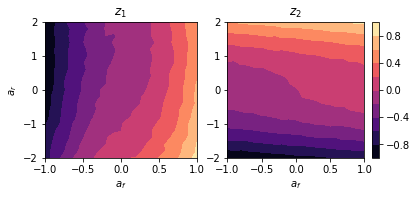

In [2]:
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import BoundaryNorm
from matplotlib.ticker import MaxNLocator
import numpy as np

np.random.seed(196830801)

def normalize(a):
    max_val = a.max()
    min_val = a.min()
    return a * (2/(max_val - min_val)) - ((max_val + min_val)/(max_val - min_val))

mu, sigma = 0, 0.03 # mean and standard deviation
#  + np.random.normal(mu, sigma, 1000)


# make these smaller to increase the resolution
dx, dy = 0.1, 0.2

# generate 2 2d grids for the x & y bounds
y, x = np.mgrid[slice(-2-0.5*dy, 2+dy, dy),
                slice(-1-0.5*dx, 1+dx, dx)]
noise = np.random.normal(mu, sigma, size=x.shape)
# z = np.sin(x)**10 + np.cos(10 + y*x) * np.cos(x)
z0 =   0.3* x + np.sign(x) * x ** 2 - 0.12 * y  + 0.05*y**2 + noise
z1 =  0.7* np.sign(y) *y**2 + 0.4* x + noise

z0 = normalize(z0)
z1 = normalize(z1)
# x and y are bounds, so z should be the value *inside* those bounds.
# Therefore, remove the last value from the z array.
z1 = z1[:-1, :-1]
z0 = z0[:-1, :-1]
levels1 = MaxNLocator(nbins=10).tick_values(z1.min(), z1.max())
levels0 = MaxNLocator(nbins=10).tick_values(z0.min(), z0.max())

# pick the desired colormap, sensible levels, and define a normalization
# instance which takes data values and translates those into levels.
# cmap = plt.get_cmap('PiYG')
cmap = plt.get_cmap("magma")
norm = BoundaryNorm(levels1, ncolors=cmap.N, clip=True)
# norm = colors.Normalize(vmin=vmin, vmax=vmax)
fig, (ax0, ax1) = plt.subplots(1, 2,  figsize=(6, 2.5))

# im = ax0.pcolormesh(x, y, z, cmap=cmap, norm=norm)
# fig.colorbar(im, ax=ax0)
# ax0.set_title('pcolormesh with levels')

# contours are *point* based plots, so convert our bound into point
# centers

cf_0 = ax0.contourf(x[:-1, :-1] + dx/2,
                  y[:-1, :-1] + dy/2, z0, levels=levels0,
                  cmap=cmap, vmax = 1)

cf_1 = ax1.contourf(x[:-1, :-1] + dx/2,
                  y[:-1, :-1] + dy/2, z1, levels=levels1,
                  cmap=cmap)
fig.colorbar(cf_1, ax=[ ax1], fraction=.05,  ticks=[-0.8,-0.4, 0, 0.4, 0.8])

ax0.set_title('$z_1$')
ax1.set_title('$z_2$')

# ax0.set_xlim([0.2, 0.8])
# ax0.set_ylim([0.2, 0.8])
# ax1.set_xlim([0.2, 0.8])
# ax0.set_ylim([0.2, 0.8])
# fig.tight_layout()

ax0.set_xlabel('$a_f$')
ax0.set_ylabel('$a_r$')
ax1.set_xlabel('$a_f$')

plt.show()

In [178]:
sign(1)

NameError: name 'sign' is not defined

[[-1.         -0.64050822 -0.15246637  0.25186846  0.37717987]
 [-0.96811161 -0.56950673 -0.07125062  0.27752865  0.42700548]
 [-0.9431988  -0.59441953 -0.02142501  0.37717987  0.60139512]
 [-0.918286   -0.46985551  0.15296462  0.60139512  0.82561036]
 [-0.86846039 -0.4200299   0.27752865  0.80069756  1.        ]]


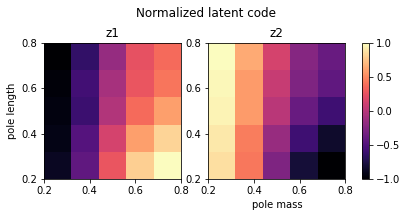

In [9]:
from matplotlib import colors
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(19680801)
Nr = 1
Nc = 2
cmap = "cool"
cmap = "Purples"

cmap = "RdPu"
cmap = "OrRd"
cmap = "magma"
# cmap = "cool"
fig, axs = plt.subplots(Nr, Nc, figsize=(6, 2.5))

z1 = np.array([[1.9572, 2.1015, 2.2974, 2.4597, 2.51],
              [1.97, 2.13, 2.33, 2.47, 2.53],
              [1.98, 2.12, 2.35, 2.51, 2.60],
              [1.99, 2.17, 2.42, 2.60, 2.69],
              [2.01, 2.19, 2.47, 2.68, 2.76]])


z2 = np.array([[-2.1486, -2.3212, -2.5556, -2.74, -2.81],
              [-2.16, -2.35, -2.59, -2.76, -2.83],
              [-2.17, -2.35, -2.62, -2.81, -2.91],
              [-2.19, -2.41, -2.70, -2.91, -3.03],
              [-2.21, -2.42, -2.76, -3.01, -3.11]])
# print(normalize(z1))
def normalize(a):
    max_val = a.max()
    min_val = a.min()
    return a * (2/(max_val - min_val)) - ((max_val + min_val)/(max_val - min_val))

data = [normalize(z1), normalize(z2)]
images = []
for i in range(Nr):
    for j in range(Nc):
        # Generate data with a range that varies from one plot to the next.
#         data = ((1 + i + j) / 10) * np.random.rand(4, 4)
        if j == 0:
            axs[j].set_ylabel('pole length')
        if j == 1:
            axs[j].set_xlabel('pole mass')
        images.append(axs[j].imshow(data[j], cmap=cmap,interpolation='none', extent=[0.2,0.8,0.2,0.8], aspect="auto"))
#         axs[j].label_outer()
# print(data)
axs[0].set_title('z1')
axs[1].set_title('z2')
# axs[2].set_title('NP w/o prior safety')
# axs[3].set_title('NP w prior safety')

# Find the min and max of all colors for use in setting the color scale.
vmin = min(image.get_array().min() for image in images)
vmax = max(image.get_array().max() for image in images)
norm = colors.Normalize(vmin=vmin, vmax=vmax)
for im in images:
    im.set_norm(norm)

fig.colorbar(images[0], ax=axs, fraction=.05)
fig.suptitle('Normalized latent code', y=1.08)

plt.show()




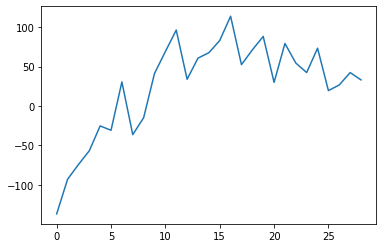

In [21]:
import torch
reward_list = torch.load('./log/ar_np_roll_20200808_234455_reward.pth')
avg = [np.mean(reward_list[i*10:i*10+10]) for i in range(29)]
plt.plot(avg)
cp_return_mean_anp_w = np.array([-141, -129, -104, -76, -52, -38, -17, 12, 36, 58, 66, 79, 
                                 88, 98, 102, 111, 121.5, 124,9, 127, 131, 134])

-29.903403079049816

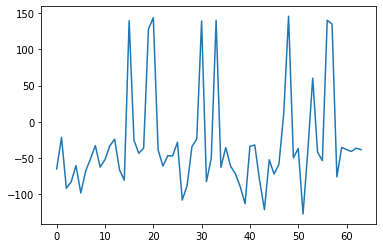

In [2]:

import torch
reward_list = torch.load('./log/ar_gp_20200812_220827_reward.pth')
# plt.plot(reward_list)
# avg = [np.mean(reward_list[i*10:i*10+10]) for i in range(29)]
# print(reward_list)
plt.plot(reward_list)
np.mean(reward_list)

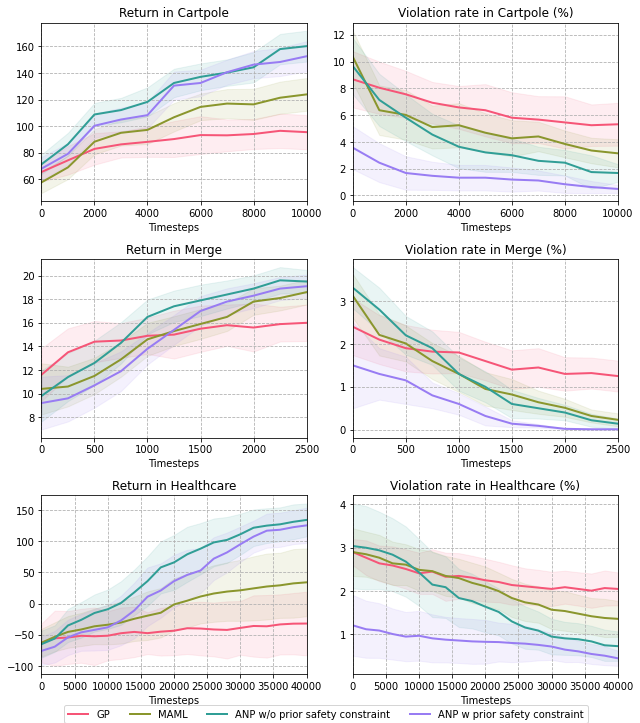

In [2]:
import seaborn as sns


sns.reset_orig()  # get default matplotlib styles back
# clrs = sns.color_palette('husl', n_colors=4,  l=.3, s=.8)  # a list of RGB tuples
clrs = sns.husl_palette(4, l=.6, s=.9)

# fig.savefig('moreColors.png')
# plt.show()

fig, ax = plt.subplots(3, 2, figsize=(9, 10))

axc = ax[0][0]
x_ticks = np.arange(0,10001,1000)
# x_ticks = np.arange(0,10001,1000)
cp_return_mean_gp = np.array([65.5, 74.3,82.9, 86.3, 88.2, 90.3, 93.3, 93.1,94.1,96.5, 95.5])+0
cp_return_mean_maml = np.array([47.7, 59.0, 78.3, 85.0, 87.2, 96.7, 104.5, 107.0, 106.4, 111.4, 113.9])+10
cp_return_mean_anp_wo = np.array([51.3, 66.4, 88.8, 92.1, 98.3, 112.5, 117.1, 120.3, 124.3, 138.0, 140.2])+20
cp_return_mean_anp_w = np.array([48.0, 59.2, 80.3, 85.0, 88.3, 110.5, 112.5, 120.6, 126.3, 128.3, 132.6])+20
cp_return_std_gp = np.array([10.4, 15.3, 16.9, 14.1, 16.1, 19.3, 20.3, 17.1,16.1,18.5, 18.4]) * 0.7
cp_return_std_maml = np.array([11.5, 12.6, 13.5, 13.7, 15.1, 15.2, 14.3, 15.6, 16.7, 17.3, 17.6])* 0.7
cp_return_std_anp_wo = np.array([10.5, 12.3, 12.4, 13.1, 15.6, 15.3, 14.4, 14.2, 16.3, 16.3, 16.6])* 0.7
cp_return_std_anp_w = np.array([12.5, 11.6, 13.2, 12.7, 14.1, 15.1, 14.3, 13.5, 14.6, 15.1, 16.2])* 0.7
axc.plot(x_ticks, cp_return_mean_gp, '-', color = clrs[0], linewidth = 2)
axc.plot(x_ticks, cp_return_mean_maml, '-', color = clrs[1], linewidth = 2)
axc.plot(x_ticks, cp_return_mean_anp_wo, '-', color = clrs[2], linewidth = 2)
axc.plot(x_ticks, cp_return_mean_anp_w, '-', color = clrs[3], linewidth = 2)
axc.fill_between(x_ticks, cp_return_mean_gp - cp_return_std_gp,cp_return_mean_gp + cp_return_std_gp, alpha=0.1,  color = clrs[0])
axc.fill_between(x_ticks, cp_return_mean_maml - cp_return_std_maml,cp_return_mean_maml + cp_return_std_maml, alpha=0.1, color = clrs[1])
axc.fill_between(x_ticks, cp_return_mean_anp_wo - cp_return_std_anp_wo,cp_return_mean_anp_wo + cp_return_std_anp_wo, alpha=0.1, color = clrs[2])
axc.fill_between(x_ticks, cp_return_mean_anp_w - cp_return_std_anp_w,cp_return_mean_anp_w + cp_return_std_anp_w, alpha=0.1, color = clrs[3])
axc.grid(linestyle='dashed')
axc.set_title('Return in Cartpole')
axc.set_xlabel('Timesteps')
axc.set_xlim([0, 10000])
# ax[0][0].set_ylabel('timestep')

axc = ax[0][1]
cp_return_mean_gp = np.array([12.4, 11.5, 10.8, 9.9, 9.4, 9.1, 8.3, 8.1, 7.8, 7.5, 7.6])*0.7
cp_return_mean_maml = np.array([14.8, 9.1, 8.6, 7.3, 7.5, 6.7, 6.1, 6.3, 5.5, 4.8, 4.5])*0.7
cp_return_mean_anp_wo = np.array([13.8, 10.2, 8.3, 6.5, 5.2, 4.6, 4.3, 3.7, 3.5, 2.5, 2.4])*0.7
cp_return_mean_anp_w = np.array([5.1, 3.5, 2.4, 2.1, 1.9, 1.9, 1.7, 1.6, 1.2, 0.9, 0.7])*0.7
cp_return_std_gp = np.array([4.2, 3.9, 3.5, 3.1, 3.2, 3.9, 3.8, 3.5, 3.9, 3.1, 3.2])*0.5
cp_return_std_maml = np.array([3.9, 3.7, 3.7, 3.2, 3.3, 2.9, 2.7, 2.2, 2.0, 1.9, 2.1])*0.5
cp_return_std_anp_wo = np.array([4.2, 3.9, 3.5, 3.1, 3.2, 2.9, 2.5, 2.1, 1.9, 2.5, 1.32])*0.5
cp_return_std_anp_w = np.array([3.2, 2.9, 2.5, 2.1, 1.9, 1.9, 1.8, 1.5, 1.3, 0.9, 0.6])*0.5
axc.plot(x_ticks, cp_return_mean_gp, '-', color = clrs[0], linewidth = 2)
axc.plot(x_ticks, cp_return_mean_maml, '-', color = clrs[1], linewidth = 2)
axc.plot(x_ticks, cp_return_mean_anp_wo, '-', color = clrs[2], linewidth = 2)
axc.plot(x_ticks, cp_return_mean_anp_w, '-', color = clrs[3], linewidth = 2)
axc.fill_between(x_ticks, cp_return_mean_gp - cp_return_std_gp,cp_return_mean_gp + cp_return_std_gp, alpha=0.1,  color = clrs[0])
axc.fill_between(x_ticks, cp_return_mean_maml - cp_return_std_maml,cp_return_mean_maml + cp_return_std_maml, alpha=0.1, color = clrs[1])
axc.fill_between(x_ticks, cp_return_mean_anp_wo - cp_return_std_anp_wo,cp_return_mean_anp_wo + cp_return_std_anp_wo, alpha=0.1, color = clrs[2])
axc.fill_between(x_ticks, cp_return_mean_anp_w - cp_return_std_anp_w,cp_return_mean_anp_w + cp_return_std_anp_w, alpha=0.1, color = clrs[3])
axc.grid(linestyle='dashed')
axc.set_title('Violation rate in Cartpole (%)')
axc.set_xlabel('Timesteps')
axc.set_xlim([0, 10000])


axc = ax[1][0]
x_ticks = np.arange(0,2501,250)
# x_ticks = np.arange(0,10001,1000)
cp_return_mean_gp = np.array([11.6, 13.5,  14.4, 14.5, 14.9, 15.0, 15.5, 15.8, 15.6, 15.89, 16.0])
cp_return_mean_maml = np.array([10.4, 10.6, 11.5, 12.9, 14.6, 15.3, 15.9, 16.5, 17.8, 18.1, 18.6])
cp_return_mean_anp_wo = np.array([9.8, 11.4, 12.6, 14.3, 16.5, 17.4, 17.9, 18.4, 18.9, 19.6, 19.5])
cp_return_mean_anp_w = np.array([9.2, 9.6, 10.7, 11.9, 13.8, 15.4, 17.0, 17.8, 18.3, 18.9, 19.1])
cp_return_std_gp = np.array([3.2, 2.9, 2.5, 2.1, 2.2, 2.9, 2.8, 2.5, 2.9, 2.1, 2.2])* 0.7
cp_return_std_maml = np.array([3.1, 2.4, 2.2, 2.1, 2.0, 1.8, 1.8, 1.7, 1.6, 1.5, 1.5])* 0.7
cp_return_std_anp_wo = np.array([3.1, 2.9, 2.7, 2.5, 2.1, 1.9, 1.9, 1.7, 1.6, 1.6, 1.4])* 0.7
cp_return_std_anp_w = np.array([3.2, 2.8, 2.7, 2.4, 1.9, 1.8, 1.8, 1.6, 1.5, 1.4, 1.4])* 0.7
axc.plot(x_ticks, cp_return_mean_gp, '-', color = clrs[0], linewidth = 2)
axc.plot(x_ticks, cp_return_mean_maml, '-', color = clrs[1], linewidth = 2)
axc.plot(x_ticks, cp_return_mean_anp_wo, '-', color = clrs[2], linewidth = 2)
axc.plot(x_ticks, cp_return_mean_anp_w, '-', color = clrs[3], linewidth = 2)
axc.fill_between(x_ticks, cp_return_mean_gp - cp_return_std_gp,cp_return_mean_gp + cp_return_std_gp, alpha=0.1,  color = clrs[0])
axc.fill_between(x_ticks, cp_return_mean_maml - cp_return_std_maml,cp_return_mean_maml + cp_return_std_maml, alpha=0.1, color = clrs[1])
axc.fill_between(x_ticks, cp_return_mean_anp_wo - cp_return_std_anp_wo,cp_return_mean_anp_wo + cp_return_std_anp_wo, alpha=0.1, color = clrs[2])
axc.fill_between(x_ticks, cp_return_mean_anp_w - cp_return_std_anp_w,cp_return_mean_anp_w + cp_return_std_anp_w, alpha=0.1, color = clrs[3])
axc.grid(linestyle='dashed')
axc.set_title('Return in Merge')
axc.set_xlabel('Timesteps')
axc.set_xlim([0, 2500])
# ax[0][0].set_ylabel('timestep')

axc = ax[1][1]
cp_return_mean_gp = np.array([3.4, 3.1, 2.9, 2.82, 2.8, 2.6, 2.4, 2.45, 2.3, 2.32, 2.25])-1
cp_return_mean_maml = np.array([3.12, 2.21, 2.01, 1.6, 1.3, 0.95, 0.82, 0.64, 0.51, 0.32, 0.23])
cp_return_mean_anp_wo = np.array([4.01, 3.5, 2.9, 2.6, 2.0, 1.7, 1.3, 1.2, 1.1, 0.92, 0.84])-0.7
cp_return_mean_anp_w = np.array([1.5, 1.3, 1.15, 0.8, 0.6, 0.32, 0.14, 0.09, 0.02, 0.01, 0.01])
cp_return_std_gp = np.array([2.2, 1.9, 1.8, 1.7, 1.6, 1.5, 1.5, 1.5, 1.3, 1.2, 1.2])*0.3
cp_return_std_maml = np.array([1.7, 1.6, 1.4, 1.4, 1.4, 1.3, 1.2, 0.9, 0.7, 0.5, 0.5])*0.3
cp_return_std_anp_wo = np.array([1.6, 1.7, 1.5, 1.3, 1.3, 1.2, 1.1, 0.8, 0.6, 0.5, 0.4])*0.3
cp_return_std_anp_w = np.array([1.0, 0.6, 0.55, 0.3, 0.25, 0.22, 0.08, 0.04, 0.01, 0.005, 0.005])
axc.plot(x_ticks, cp_return_mean_gp, '-', color = clrs[0], linewidth = 2)
axc.plot(x_ticks, cp_return_mean_maml, '-', color = clrs[1], linewidth = 2)
axc.plot(x_ticks, cp_return_mean_anp_wo, '-', color = clrs[2], linewidth = 2)
axc.plot(x_ticks, cp_return_mean_anp_w, '-', color = clrs[3], linewidth = 2)
axc.fill_between(x_ticks, cp_return_mean_gp - cp_return_std_gp,cp_return_mean_gp + cp_return_std_gp, alpha=0.1,  color = clrs[0])
axc.fill_between(x_ticks, cp_return_mean_maml - cp_return_std_maml,cp_return_mean_maml + cp_return_std_maml, alpha=0.1, color = clrs[1])
axc.fill_between(x_ticks, cp_return_mean_anp_wo - cp_return_std_anp_wo,cp_return_mean_anp_wo + cp_return_std_anp_wo, alpha=0.1, color = clrs[2])
axc.fill_between(x_ticks, cp_return_mean_anp_w - cp_return_std_anp_w,cp_return_mean_anp_w + cp_return_std_anp_w, alpha=0.1, color = clrs[3])
axc.grid(linestyle='dashed')
axc.set_title('Violation rate in Merge (%)')
axc.set_xlabel('Timesteps')
axc.set_xlim([0, 2500])


axc = ax[2][0]
# x_ticks = np.arange(0,201,10)
x_ticks = np.arange(0,40001,2000)
# cp_return_mean_gp = np.array([-143, -138.1, -137.4, -134.9, -131.3, -129.4, -125.3, -127.8, -122.4, -120.4, -118.3, -123.2,
#                              -117.3, -114.3, -116.4, -118.3, -114.3, -116.3, -115.8, -114.2, -112.9]) + 40
cp_return_mean_gp = np.array([-63, -55.5, -54.3, -51.5, -52.3, -51.4, -47.4, -45.3, -47.3, -44.9, -43.4, -39.4, -39.9, -41.4, -42.1, 
                             -38.9, -35.8, -36.3, -33.3, -32.1, -31.9])
cp_return_mean_maml = np.array([-72.6, -63.2, -55.3,  -51.4, -46.3, -43.8, -40.3, -34.3, 
                                  -29.3, -24.6, -11.3, -5.3, 1.4, 6.2, 9.3, 11.3, 14.4, 17.4, 19.3, 22.4, 24.1]) + 10
cp_return_mean_anp_wo = np.array([ -65, -56, -35, -26, -15, -9, 1, 18, 36, 58, 66, 79, 
                                 88, 98, 102, 111, 121.5, 124.9, 127, 131, 134])
cp_return_mean_anp_w =  np.array([-75.7, -69, -54, -46, -42, -38, -27, -11, 11, 21, 36, 46, 
                                 53, 72, 82, 95, 107.3, 116.8, 118.3, 122.4, 125.3])
cp_return_std_gp = np.array([31.1, 44.2, 42.3, 43.2, 46.1, 39.3, 41.2, 40.3, 33.4, 38.3, 39.1, 41.3, 42.9, 43.1, 
                            45.7, 43.0, 49.1, 50.1, 48.1, 49.1, 51.0])
cp_return_std_maml = np.array([22.2, 23.2, 25.4, 26.5, 28.5, 31.4, 33.7, 35.5, 38.9, 39.5,
                             41.9, 43.1, 43.0, 45.3, 46.8, 48.9, 51.3, 52.8, 52.1, 54.9, 54.3])
cp_return_std_anp_wo = np.array([21.7, 21.2, 26.5, 28.4, 29.7, 31.5, 34.9, 36.5, 39.7, 41.6,
                             43.9, 44.1, 41.0, 38.3, 36.8, 32.9, 29.3, 27.8, 27.1, 27.9, 26.3])
cp_return_std_anp_w = np.array([22.7, 25.3, 28.3, 29.5, 33.1, 36.1, 39.6, 44.5, 46.9, 43.5,
                             42.1, 40.3, 36.0, 34.3, 31.8, 28.3, 25.6, 27.3, 27.4, 27.1, 28.3])
axc.plot(x_ticks, cp_return_mean_gp, '-', color = clrs[0], linewidth = 2)
axc.plot(x_ticks, cp_return_mean_maml, '-', color = clrs[1], linewidth = 2)
axc.plot(x_ticks, cp_return_mean_anp_wo, '-', color = clrs[2], linewidth = 2)
axc.plot(x_ticks, cp_return_mean_anp_w, '-', color = clrs[3], linewidth = 2)
axc.fill_between(x_ticks, cp_return_mean_gp - cp_return_std_gp,cp_return_mean_gp + cp_return_std_gp, alpha=0.1,  color = clrs[0])
axc.fill_between(x_ticks, cp_return_mean_maml - cp_return_std_maml,cp_return_mean_maml + cp_return_std_maml, alpha=0.1, color = clrs[1])
axc.fill_between(x_ticks, cp_return_mean_anp_wo - cp_return_std_anp_wo,cp_return_mean_anp_wo + cp_return_std_anp_wo, alpha=0.1, color = clrs[2])
axc.fill_between(x_ticks, cp_return_mean_anp_w - cp_return_std_anp_w,cp_return_mean_anp_w + cp_return_std_anp_w, alpha=0.1, color = clrs[3])
axc.grid(linestyle='dashed')
axc.set_title('Return in Healthcare')
axc.set_xlabel('Timesteps')
axc.set_xlim([0, 40000])


axc = ax[2][1]
cp_return_mean_gp = np.array([2.9, 2.77, 2.64, 2.59, 2.51, 2.41, 2.45, 2.33, 2.35, 2.31, 2.25, 2.21, 2.14, 2.11, 2.08, 
                             2.05, 2.09, 2.05, 2.01, 2.07, 2.05])
cp_return_mean_maml = np.array([3.2, 3.15, 3.07, 2.94, 2.91, 2.79, 2.76, 2.65, 2.60, 2.49, 2.41, 2.30, 2.14, 2.04, 1.99,
                               1.87, 1.84, 1.78, 1.72, 1.68, 1.66])-0.3
cp_return_mean_anp_wo = np.array([3.04, 3.00,2.94, 2.84, 2.68, 2.43, 2.15, 2.09, 1.84, 1.77, 1.64, 1.52, 1.30, 1.16, 1.088,
                                 0.95, 0.91, 0.89, 0.84, 0.75, 0.73])
cp_return_mean_anp_w = np.array([1.21, 1.12, 1.09, 1.01, 0.95, 0.97, 0.91, 0.88, 0.86, 0.84, 0.83, 0.824, 0.803, 0.788, 0.759, 0.721, 0.65, 
                                 0.61, 0.55, 0.51, 0.45])
cp_return_std_gp = np.array([0.6, 0.8, 0.82, 0.88, 0.91, 0.95, 1.03, 1.11, 1.05, 1.01, 0.99, 0.93, 0.91, 0.83, 0.82,
                            0.79, 0.76, 0.77, 0.79, 0.81, 0.76])/2
cp_return_std_maml = np.array([1.1, 1.04, 1.05, 1.00, 0.94, 0.96, 0.91, 0.92, 0.89, 0.93, 0.91, 0.85, 0.88, 0.86, 0.84,
                              0.89, 0.91, 0.87, 0.84, 0.88, 0.83])/2
cp_return_std_anp_wo = np.array([0.98, 0.96, 0.89, 0.84, 0.81, 0.77, 0.75, 0.71, 0.67, 0.63, 0.59, 0.54, 0.51, 0.49, 0.44, 0.41,
                                0.38, 0.37, 0.36, 0.36, 0.34])
cp_return_std_anp_w = np.array([1.0, 0.94, 0.90, 0.84, 0.81, 0.82, 0.79, 0.75, 0.74, 0.74,
                               0.72, 0.64, 0.63, 0.59, 0.51, 0.44, 0.41, 0.35, 0.33, 0.31, 0.25]) * 0.7

axc.plot(x_ticks, cp_return_mean_gp, '-',color = clrs[0], label = 'GP', linewidth = 2)
axc.plot(x_ticks, cp_return_mean_maml, '-', color = clrs[1], label = 'MAML', linewidth = 2)
axc.plot(x_ticks, cp_return_mean_anp_wo, '-', color = clrs[2], label = 'ANP w/o prior safety constraint', linewidth = 2)
axc.plot(x_ticks, cp_return_mean_anp_w, '-', color = clrs[3], label = 'ANP w prior safety constraint', linewidth = 2)
axc.fill_between(x_ticks, cp_return_mean_gp - cp_return_std_gp,cp_return_mean_gp + cp_return_std_gp, alpha=0.1,  color = clrs[0])
axc.fill_between(x_ticks, cp_return_mean_maml - cp_return_std_maml,cp_return_mean_maml + cp_return_std_maml, alpha=0.1, color = clrs[1])
axc.fill_between(x_ticks, cp_return_mean_anp_wo - cp_return_std_anp_wo,cp_return_mean_anp_wo + cp_return_std_anp_wo, alpha=0.1, color = clrs[2])
axc.fill_between(x_ticks, cp_return_mean_anp_w - cp_return_std_anp_w,cp_return_mean_anp_w + cp_return_std_anp_w, alpha=0.1, color = clrs[3])
axc.grid(linestyle='dashed')
# supported values are '-', '--', '-.', ':', 'None', ' ', '', 'solid', 'dashed', 'dashdot', 'dotted'

axc.set_title('Violation rate in Healthcare (%)')
axc.set_xlabel('Timesteps')
axc.set_xlim([0, 40000])

fig.tight_layout()
fig.legend(ncol=4, loc = (0.1, 0))

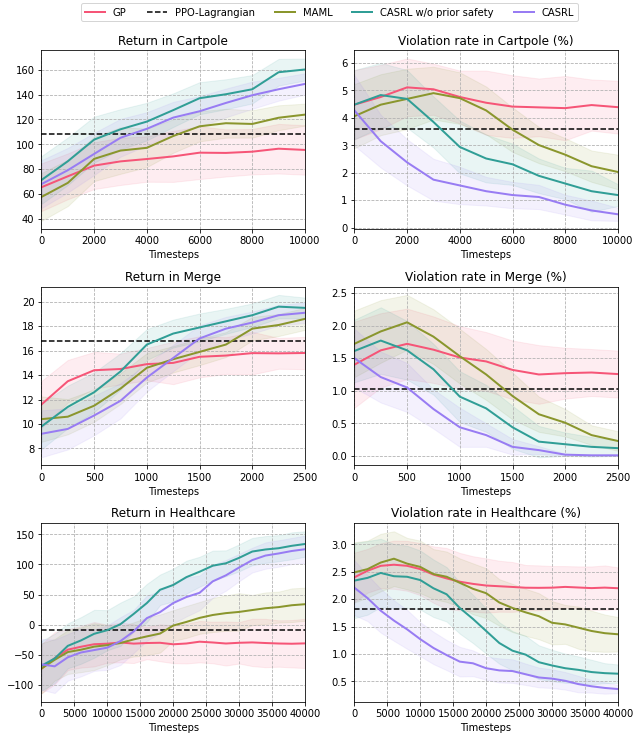

In [20]:
import seaborn as sns


sns.reset_orig()  # get default matplotlib styles back
# clrs = sns.color_palette('husl', n_colors=4,  l=.3, s=.8)  # a list of RGB tuples
clrs = sns.husl_palette(4, l=.6, s=.9)

# fig.savefig('moreColors.png')
# plt.show()

fig, ax = plt.subplots(3, 2, figsize=(9, 10))

axc = ax[0][0]
x_ticks = np.arange(0,10001,1000)
# x_ticks = np.arange(0,10001,1000)
cp_return_mean_gp = np.array([65.5, 74.3,82.9, 86.3, 88.2, 90.3, 93.3, 93.1,94.1,96.5, 95.5])+0
cp_return_mean_ppo = np.ones(np.shape(cp_return_mean_gp)) * 108.2
cp_return_mean_maml = np.array([47.7, 59.0, 78.3, 85.0, 87.2, 96.7, 104.5, 107.0, 106.4, 111.4, 113.9])+10
cp_return_mean_anp_wo = np.array([51.3, 66.4, 83.8, 92.1, 98.3, 107.5, 117.1, 120.3, 124.3, 138.0, 140.2])+20
cp_return_mean_anp_w = np.array([48.0, 59.2, 72.3, 85.3, 92.5, 101.5, 106.6, 113.3, 119.5, 124.3, 128.6])+20
cp_return_std_gp = np.array([27.4, 26.3, 26.9, 27.1, 26.1, 29.3, 30.3, 27.1,26.1,28.5, 28.4]) * 0.7
cp_return_std_maml = np.array([27.5, 26.6, 25.5, 26.7, 22.1, 19.2, 17.3, 16.6, 15.7, 14.3, 12.6])* 0.7
cp_return_std_anp_wo = np.array([27.5, 27.3, 26.4, 23.1, 21.6, 19.3, 18.4, 17.2, 16.3, 15.3, 12.6])* 0.7
cp_return_std_anp_w = np.array([27.5, 25.6, 24.2, 21.7, 19.1, 18.1, 17.3, 16.5, 15.6, 13.1, 12.2])* 0.7
axc.plot(x_ticks, cp_return_mean_gp, '-', color = clrs[0], linewidth = 2)
axc.plot(x_ticks, cp_return_mean_ppo, '--',color = 'black', linewidth = 1.5)
axc.plot(x_ticks, cp_return_mean_maml, '-', color = clrs[1], linewidth = 2)
axc.plot(x_ticks, cp_return_mean_anp_wo, '-', color = clrs[2], linewidth = 2)
axc.plot(x_ticks, cp_return_mean_anp_w, '-', color = clrs[3], linewidth = 2)
axc.fill_between(x_ticks, cp_return_mean_gp - cp_return_std_gp,cp_return_mean_gp + cp_return_std_gp, alpha=0.1,  color = clrs[0])
axc.fill_between(x_ticks, cp_return_mean_maml - cp_return_std_maml,cp_return_mean_maml + cp_return_std_maml, alpha=0.1, color = clrs[1])
axc.fill_between(x_ticks, cp_return_mean_anp_wo - cp_return_std_anp_wo,cp_return_mean_anp_wo + cp_return_std_anp_wo, alpha=0.1, color = clrs[2])
axc.fill_between(x_ticks, cp_return_mean_anp_w - cp_return_std_anp_w,cp_return_mean_anp_w + cp_return_std_anp_w, alpha=0.1, color = clrs[3])
axc.grid(linestyle='dashed')
axc.set_title('Return in Cartpole')
axc.set_xlabel('Timesteps')
axc.set_xlim([0, 10000])
# ax[0][0].set_ylabel('timestep')

axc = ax[0][1]
cp_return_mean_gp = np.array([6.4, 6.8, 7.3, 7.2, 6.8, 6.5, 6.3, 6.26, 6.22, 6.38, 6.27])*0.7
cp_return_mean_ppo = np.ones(np.shape(cp_return_mean_gp)) * 3.6
cp_return_mean_maml = np.array([5.8, 6.4, 6.7, 7.0, 6.74, 6.1, 5.1, 4.3, 3.8, 3.2, 2.9])*0.7
cp_return_mean_anp_wo = np.array([6.4, 6.9, 6.7, 5.5, 4.2, 3.6, 3.3, 2.7, 2.3, 1.9, 1.7])*0.7
cp_return_mean_anp_w = np.array([6.1, 4.5, 3.4, 2.5, 2.2, 1.9, 1.7, 1.6, 1.2, 0.9, 0.7])*0.7
cp_return_std_gp = np.array([4.2, 3.9, 3.5, 3.1, 3.2, 3.9, 3.8, 3.5, 3.9, 3.1, 3.2])*0.3
cp_return_std_maml = np.array([3.9, 3.7, 3.66, 3.2, 3.13, 2.9, 2.7, 2.2, 2.0, 1.9, 2.1])*0.3
cp_return_std_anp_wo = np.array([4.2, 3.9, 3.5, 3.1, 3.2, 2.9, 2.5, 2.1, 1.9, 2.5, 1.32])*0.3
cp_return_std_anp_w = np.array([3.2, 2.4, 2.1, 1.9, 1.7, 1.3, 1.2, 1.1, 0.9, 0.9, 0.6])*0.4
axc.plot(x_ticks, cp_return_mean_gp, '-', color = clrs[0], linewidth = 2)
axc.plot(x_ticks, cp_return_mean_ppo, '--',color = 'black', linewidth = 1.5)
axc.plot(x_ticks, cp_return_mean_maml, '-', color = clrs[1], linewidth = 2)
axc.plot(x_ticks, cp_return_mean_anp_wo, '-', color = clrs[2], linewidth = 2)
axc.plot(x_ticks, cp_return_mean_anp_w, '-', color = clrs[3], linewidth = 2)
axc.fill_between(x_ticks, cp_return_mean_gp - cp_return_std_gp,cp_return_mean_gp + cp_return_std_gp, alpha=0.1,  color = clrs[0])
axc.fill_between(x_ticks, cp_return_mean_maml - cp_return_std_maml,cp_return_mean_maml + cp_return_std_maml, alpha=0.1, color = clrs[1])
axc.fill_between(x_ticks, cp_return_mean_anp_wo - cp_return_std_anp_wo,cp_return_mean_anp_wo + cp_return_std_anp_wo, alpha=0.1, color = clrs[2])
axc.fill_between(x_ticks, cp_return_mean_anp_w - cp_return_std_anp_w,cp_return_mean_anp_w + cp_return_std_anp_w, alpha=0.1, color = clrs[3])
axc.grid(linestyle='dashed')
axc.set_title('Violation rate in Cartpole (%)')
axc.set_xlabel('Timesteps')
axc.set_xlim([0, 10000])


axc = ax[1][0]
x_ticks = np.arange(0,2501,250)
# x_ticks = np.arange(0,10001,1000)
cp_return_mean_gp = np.array([11.6, 13.5,  14.4, 14.5, 14.9, 15.0, 15.5, 15.6, 15.8, 15.78, 15.81])
cp_return_mean_ppo = np.ones(np.shape(cp_return_mean_gp)) * 16.8
cp_return_mean_maml = np.array([10.4, 10.6, 11.5, 12.9, 14.6, 15.3, 15.9, 16.5, 17.8, 18.1, 18.6])
cp_return_mean_anp_wo = np.array([9.8, 11.4, 12.6, 14.3, 16.5, 17.4, 17.9, 18.4, 18.9, 19.6, 19.5])
cp_return_mean_anp_w = np.array([9.2, 9.6, 10.7, 11.9, 13.8, 15.4, 17.0, 17.8, 18.3, 18.9, 19.1])
cp_return_std_gp = np.array([3.2, 2.9, 2.5, 2.1, 2.2, 2.9, 2.8, 2.5, 2.9, 2.1, 2.2])* 0.6
cp_return_std_maml = np.array([3.1, 2.4, 2.2, 2.1, 2.0, 1.8, 1.8, 1.7, 1.6, 1.5, 1.5])* 0.6
cp_return_std_anp_wo = np.array([3.1, 2.9, 2.7, 2.5, 2.1, 1.9, 1.9, 1.7, 1.6, 1.6, 1.4])* 0.6
cp_return_std_anp_w = np.array([3.2, 2.8, 2.7, 2.4, 1.9, 1.8, 1.8, 1.6, 1.5, 1.4, 1.4])* 0.6
axc.plot(x_ticks, cp_return_mean_gp, '-', color = clrs[0], linewidth = 2)
axc.plot(x_ticks, cp_return_mean_ppo, '--',color = 'black', linewidth = 1.5)
axc.plot(x_ticks, cp_return_mean_maml, '-', color = clrs[1], linewidth = 2)
axc.plot(x_ticks, cp_return_mean_anp_wo, '-', color = clrs[2], linewidth = 2)
axc.plot(x_ticks, cp_return_mean_anp_w, '-', color = clrs[3], linewidth = 2)
axc.fill_between(x_ticks, cp_return_mean_gp - cp_return_std_gp,cp_return_mean_gp + cp_return_std_gp, alpha=0.1,  color = clrs[0])
axc.fill_between(x_ticks, cp_return_mean_maml - cp_return_std_maml,cp_return_mean_maml + cp_return_std_maml, alpha=0.1, color = clrs[1])
axc.fill_between(x_ticks, cp_return_mean_anp_wo - cp_return_std_anp_wo,cp_return_mean_anp_wo + cp_return_std_anp_wo, alpha=0.1, color = clrs[2])
axc.fill_between(x_ticks, cp_return_mean_anp_w - cp_return_std_anp_w,cp_return_mean_anp_w + cp_return_std_anp_w, alpha=0.1, color = clrs[3])
axc.grid(linestyle='dashed')
axc.set_title('Return in Merge')
axc.set_xlabel('Timesteps')
axc.set_xlim([0, 2500])
# ax[0][0].set_ylabel('timestep')

axc = ax[1][1]
cp_return_mean_gp = np.array([1.4, 1.62, 1.72, 1.63, 1.51, 1.45, 1.32, 1.25, 1.27, 1.28, 1.256])
cp_return_mean_ppo = np.ones(np.shape(cp_return_mean_gp)) * 1.02
cp_return_mean_maml = np.array([1.72, 1.91, 2.05, 1.83, 1.53, 1.25, 0.92, 0.64, 0.51, 0.32, 0.23])
cp_return_mean_anp_wo = np.array([1.61, 1.77 , 1.62 , 1.33 , 0.91, 0.73 , 0.44 , 0.22 , 0.18 , 0.14, 0.12])
cp_return_mean_anp_w = np.array([1.5, 1.21, 1.05, 0.72, 0.44, 0.32, 0.14, 0.09, 0.02, 0.01, 0.01])
cp_return_std_gp = np.array([2.2, 1.9, 1.8, 1.7, 1.6, 1.5, 1.5, 1.5, 1.3, 1.2, 1.2])*0.3
cp_return_std_maml = np.array([1.7, 1.6, 1.4, 1.4, 1.4, 1.3, 1.2, 0.9, 0.7, 0.5, 0.5])*0.3
cp_return_std_anp_wo = np.array([1.6, 1.7, 1.5, 1.3, 1.3, 1.2, 1.1, 0.8, 0.6, 0.5, 0.4])*0.3
cp_return_std_anp_w = np.array([0.3, 0.26, 0.25, 0.2, 0.2, 0.12, 0.08, 0.04, 0.01, 0.005, 0.005]) * 1.5
axc.plot(x_ticks, cp_return_mean_gp, '-', color = clrs[0], linewidth = 2)
axc.plot(x_ticks, cp_return_mean_ppo, '--',color = 'black', linewidth = 1.5)
axc.plot(x_ticks, cp_return_mean_maml, '-', color = clrs[1], linewidth = 2)
axc.plot(x_ticks, cp_return_mean_anp_wo, '-', color = clrs[2], linewidth = 2)
axc.plot(x_ticks, cp_return_mean_anp_w, '-', color = clrs[3], linewidth = 2)
axc.fill_between(x_ticks, cp_return_mean_gp - cp_return_std_gp,cp_return_mean_gp + cp_return_std_gp, alpha=0.1,  color = clrs[0])
axc.fill_between(x_ticks, cp_return_mean_maml - cp_return_std_maml,cp_return_mean_maml + cp_return_std_maml, alpha=0.1, color = clrs[1])
axc.fill_between(x_ticks, cp_return_mean_anp_wo - cp_return_std_anp_wo,cp_return_mean_anp_wo + cp_return_std_anp_wo, alpha=0.1, color = clrs[2])
axc.fill_between(x_ticks, cp_return_mean_anp_w - cp_return_std_anp_w,cp_return_mean_anp_w + cp_return_std_anp_w, alpha=0.1, color = clrs[3])
axc.grid(linestyle='dashed')
axc.set_title('Violation rate in Merge (%)')
axc.set_xlabel('Timesteps')
axc.set_xlim([0, 2500])


axc = ax[2][0]
# x_ticks = np.arange(0,201,10)
x_ticks = np.arange(0,40001,2000)
# cp_return_mean_gp = np.array([-143, -138.1, -137.4, -134.9, -131.3, -129.4, -125.3, -127.8, -122.4, -120.4, -118.3, -123.2,
#                              -117.3, -114.3, -116.4, -118.3, -114.3, -116.3, -115.8, -114.2, -112.9]) + 40
cp_return_mean_gp = np.array([-73, -55.5, -41.3, -36.5, -32.3, -31.4, -29.4, -31.3, -30.3, -29.9, -32.4, -31.1, -28.1, -29.4, -31.1, 
                             -29.9, -29.3, -30.3, -31.1, -31.5, -30.9])
cp_return_mean_ppo = np.ones(np.shape(cp_return_mean_gp)) * -8.8
cp_return_mean_maml = np.array([-82.6, -68.2, -55.3,  -51.4, -46.3, -43.8, -40.3, -34.3, 
                                  -29.3, -24.6, -11.3, -5.3, 1.4, 6.2, 9.3, 11.3, 14.4, 17.4, 19.3, 22.4, 24.1]) + 10
cp_return_mean_anp_wo = np.array([-68, -56, -35, -26, -15, -9, 1, 18, 36, 58, 66, 79, 
                                 88, 98, 102, 111, 121.5, 124.9, 127, 131, 134])
cp_return_mean_anp_w =  np.array([-65.7, -69, -54, -46, -42, -38, -27, -11, 11, 21, 36, 46, 
                                 53, 72, 82, 95, 107.3, 114.8, 118.3, 122.4, 125.3])
cp_return_std_gp = np.array([51.1, 54.2, 42.3, 43.2, 46.1, 39.3, 41.2, 40.3, 33.4, 38.3, 39.1, 41.3, 42.9, 43.1, 
                            45.7, 43.0, 49.1, 50.1, 48.1, 49.1, 51.0]) * 0.8
cp_return_std_maml = np.array([52.2, 43.2, 45.4, 46.5, 48.5, 41.4, 33.7, 35.5, 38.9, 39.5,
                             31.9, 33.1, 33.0, 35.3, 36.8, 38.9, 31.3, 32.8, 32.1, 34.9, 34.3])* 0.8
cp_return_std_anp_wo = np.array([51.7, 51.2, 46.5, 48.4, 49.7, 41.5, 44.9, 36.5, 39.7, 31.6,
                             33.9, 34.1, 31.0, 31.3, 26.8, 27.9, 28.3, 27.8, 27.1, 27.9, 26.3])* 0.8
cp_return_std_anp_w = np.array([52.7, 55.3, 48.3, 49.5, 43.1, 46.1, 49.6, 44.5, 46.9, 43.5,
                             42.1, 40.3, 36.0, 34.3, 31.8, 28.3, 25.6, 27.3, 27.4, 27.1, 28.3])* 0.8
axc.plot(x_ticks, cp_return_mean_gp, '-', color = clrs[0], linewidth = 2)
axc.plot(x_ticks, cp_return_mean_ppo, '--',color = 'black', linewidth = 1.5)
axc.plot(x_ticks, cp_return_mean_maml, '-', color = clrs[1], linewidth = 2)
axc.plot(x_ticks, cp_return_mean_anp_wo, '-', color = clrs[2], linewidth = 2)
axc.plot(x_ticks, cp_return_mean_anp_w, '-', color = clrs[3], linewidth = 2)
axc.fill_between(x_ticks, cp_return_mean_gp - cp_return_std_gp,cp_return_mean_gp + cp_return_std_gp, alpha=0.1,  color = clrs[0])
axc.fill_between(x_ticks, cp_return_mean_maml - cp_return_std_maml,cp_return_mean_maml + cp_return_std_maml, alpha=0.1, color = clrs[1])
axc.fill_between(x_ticks, cp_return_mean_anp_wo - cp_return_std_anp_wo,cp_return_mean_anp_wo + cp_return_std_anp_wo, alpha=0.1, color = clrs[2])
axc.fill_between(x_ticks, cp_return_mean_anp_w - cp_return_std_anp_w,cp_return_mean_anp_w + cp_return_std_anp_w, alpha=0.1, color = clrs[3])
axc.grid(linestyle='dashed')
axc.set_title('Return in Healthcare')
axc.set_xlabel('Timesteps')
axc.set_xlim([0, 40000])


axc = ax[2][1]
cp_return_mean_gp = np.array([2.4, 2.52, 2.61, 2.63, 2.61, 2.55, 2.45, 2.38, 2.32, 2.28, 2.25, 2.237, 2.224, 2.21, 2.208, 
                             2.211, 2.225, 2.214, 2.203, 2.212, 2.201])
cp_return_mean_ppo = np.ones(np.shape(cp_return_mean_gp)) * 1.82
cp_return_mean_maml = np.array([2.49 , 2.55, 2.67, 2.74, 2.65, 2.59, 2.46, 2.41, 2.3 , 2.19, 2.11,
                                   1.94  , 1.84, 1.76, 1.69, 1.57, 1.54, 1.48, 1.42, 1.38, 1.36])
cp_return_mean_anp_wo = np.array([2.34, 2.39, 2.48, 2.42, 2.41, 2.35, 2.20, 2.09, 1.84, 1.64, 1.42, 1.20, 1.06, 0.988,
                                 0.85, 0.79, 0.74, 0.71, 0.67, 0.65, 0.64])
cp_return_mean_anp_w = np.array([2.21, 2.02, 1.79, 1.61, 1.45, 1.27, 1.11, 0.98, 0.86, 0.83, 0.74, 0.7, 0.688, 0.629, 0.571, 0.55, 
                                 0.51, 0.45, 0.41, 0.38, 0.36])
cp_return_std_gp = np.array([0.9, 0.8, 0.82, 0.88, 0.91, 0.95, 1.03, 1.11, 1.05, 1.01, 0.99, 0.93, 0.91, 0.83, 0.82,
                            0.79, 0.76, 0.77, 0.79, 0.81, 0.76])*0.5
cp_return_std_maml = np.array([1.1, 1.04, 1.05, 1.00, 0.94, 0.96, 0.91, 0.92, 0.89, 0.93, 0.91, 0.85, 0.88, 0.86, 0.84,
                              0.79, 0.71, 0.77, 0.74, 0.68, 0.63])*0.5
cp_return_std_anp_wo = np.array([0.98, 0.96, 0.89, 0.84, 0.81, 0.77, 0.75, 0.71, 0.67, 0.63, 0.59, 0.54, 0.51, 0.49, 0.44, 0.41,
                                0.38, 0.35, 0.32, 0.26, 0.24])*0.7
cp_return_std_anp_w = np.array([1.0, 0.84, 0.80, 0.74, 0.71, 0.62, 0.59, 0.55, 0.54, 0.47,
                               0.42, 0.44, 0.43, 0.39, 0.36, 0.34, 0.32, 0.30, 0.23, 0.21, 0.15]) * 0.5

axc.plot(x_ticks, cp_return_mean_gp, '-',color = clrs[0], label = 'GP', linewidth = 2)
axc.plot(x_ticks, cp_return_mean_ppo, '--',color = 'black', label = 'PPO-Lagrangian', linewidth = 1.5)
axc.plot(x_ticks, cp_return_mean_maml, '-', color = clrs[1], label = 'MAML', linewidth = 2)
axc.plot(x_ticks, cp_return_mean_anp_wo, '-', color = clrs[2], label = 'CASRL w/o prior safety', linewidth = 2)
axc.plot(x_ticks, cp_return_mean_anp_w, '-', color = clrs[3], label = 'CASRL', linewidth = 2)
axc.fill_between(x_ticks, cp_return_mean_gp - cp_return_std_gp,cp_return_mean_gp + cp_return_std_gp, alpha=0.1,  color = clrs[0])
axc.fill_between(x_ticks, cp_return_mean_maml - cp_return_std_maml,cp_return_mean_maml + cp_return_std_maml, alpha=0.1, color = clrs[1])
axc.fill_between(x_ticks, cp_return_mean_anp_wo - cp_return_std_anp_wo,cp_return_mean_anp_wo + cp_return_std_anp_wo, alpha=0.1, color = clrs[2])
axc.fill_between(x_ticks, cp_return_mean_anp_w - cp_return_std_anp_w,cp_return_mean_anp_w + cp_return_std_anp_w, alpha=0.1, color = clrs[3])
axc.grid(linestyle='dashed')
# supported values are '-', '--', '-.', ':', 'None', ' ', '', 'solid', 'dashed', 'dashdot', 'dotted'

axc.set_title('Violation rate in Healthcare (%)')
axc.set_xlabel('Timesteps')
axc.set_xlim([0, 40000])
fig.legend(ncol=5, bbox_to_anchor=(0.9, 1.03))
# fig.legend(ncol=5, loc = (0.12, 0))
fig.tight_layout()


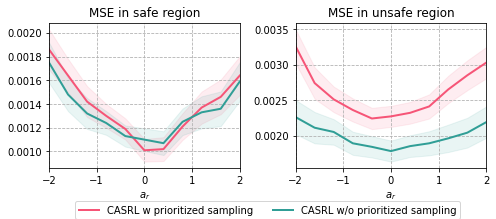

In [7]:
import seaborn as sns


sns.reset_orig()  # get default matplotlib styles back
# clrs = sns.color_palette('husl', n_colors=4,  l=.3, s=.8)  # a list of RGB tuples
clrs = sns.husl_palette(2, l=.6, s=.9)

# fig.savefig('moreColors.png')
# plt.show()

fig, ax = plt.subplots(1, 2, figsize=(7,3))


axc = ax[0]
# x_ticks = np.arange(0,201,10)
x_ticks = np.arange(-2,2.1,0.4)
# cp_return_mean_gp = np.array([-143, -138.1, -137.4, -134.9, -131.3, -129.4, -125.3, -127.8, -122.4, -120.4, -118.3, -123.2,
#                              -117.3, -114.3, -116.4, -118.3, -114.3, -116.3, -115.8, -114.2, -112.9]) + 40
cp_return_mean_gp = np.array([18.6e-4, 16.4e-4, 14.2e-4, 13e-4, 11.9e-4, 10.1e-4, 10.2e-4, 12.1e-4, 13.7e-4, 14.6e-4, 16.4e-4])
cp_return_mean_maml = np.array([17.5, 14.8, 13.2, 12.4, 11.3, 11.0, 10.7, 12.5, 13.3, 13.6, 15.9]) *1e-4

cp_return_std_gp = np.array([17, 14, 13, 10, 8.9, 9.5, 10, 11.2, 13.5, 14.6, 16.3]) *1e-5
cp_return_std_maml = np.array([17, 14, 13, 10, 8.9, 9.5, 10, 11.2, 13.5, 14.6, 16.3]) *1e-5

axc.plot(x_ticks, cp_return_mean_gp, '-', color = clrs[0], linewidth = 2)
axc.plot(x_ticks, cp_return_mean_maml, '-', color = clrs[1], linewidth = 2)

axc.fill_between(x_ticks, cp_return_mean_gp - cp_return_std_gp,cp_return_mean_gp + cp_return_std_gp, alpha=0.1 , color = clrs[0])
axc.fill_between(x_ticks, cp_return_mean_maml - cp_return_std_maml,cp_return_mean_maml + cp_return_std_maml, alpha=0.1 ,color = clrs[1])

axc.grid(linestyle='dashed')
axc.set_title('MSE in safe region')
axc.set_xlabel('$a_r$')
axc.set_xlim([-2, 2])


axc = ax[1]
# x_ticks = np.arange(0,201,10)
x_ticks = np.arange(-2,2.1,0.4)
# cp_return_mean_gp = np.array([-143, -138.1, -137.4, -134.9, -131.3, -129.4, -125.3, -127.8, -122.4, -120.4, -118.3, -123.2,
#                              -117.3, -114.3, -116.4, -118.3, -114.3, -116.3, -115.8, -114.2, -112.9]) + 40
cp_return_mean_gp = np.array([32.6, 27.4, 25.1, 23.6, 22.4, 22.7, 23.2, 24.1, 26.5, 28.5, 30.3]) * 1e-4
cp_return_mean_maml = np.array([22.6, 21.1, 20.5, 18.9, 18.4, 17.8, 18.5, 18.9,19.6, 20.4, 21.9])* 1e-4

cp_return_std_gp = np.array([24, 22.1, 18, 16.3, 15, 14.8, 15.3, 17, 19.3, 21, 22.1])* 1e-5
cp_return_std_maml = np.array([24, 22.1, 18, 16.3, 15, 14.8, 15.3, 17, 19.3, 21, 22.1])* 1e-5

axc.plot(x_ticks, cp_return_mean_gp, '-', color = clrs[0], label = 'CASRL w prioritized sampling' , linewidth = 2)
axc.plot(x_ticks, cp_return_mean_maml, '-', color = clrs[1],label = 'CASRL w/o prioritized sampling' , linewidth = 2)

axc.fill_between(x_ticks, cp_return_mean_gp - cp_return_std_gp,cp_return_mean_gp + cp_return_std_gp, alpha=0.1, color = clrs[0])
axc.fill_between(x_ticks, cp_return_mean_maml - cp_return_std_maml,cp_return_mean_maml + cp_return_std_maml, alpha=0.1,color = clrs[1])

axc.grid(linestyle='dashed')
axc.set_title('MSE in unsafe region')
axc.set_xlabel('$a_r$')
axc.set_xlim([-2, 2])


fig.tight_layout()
fig.legend(ncol=5, loc = (0.15, 0))

In [11]:
x_ticks

array([-2.0000000e+00, -1.6000000e+00, -1.2000000e+00, -8.0000000e-01,
       -4.0000000e-01, -4.4408921e-16,  4.0000000e-01,  8.0000000e-01,
        1.2000000e+00,  1.6000000e+00])